# Coding for Humanities final exam 2020

Rules:

- You should work alone. Do NOT discuss the exam with anyone until after the deadline. Identical answers will be reported to the board of examiners.
- You may look up any information you want (including re-using code from the labs or lectures, or using code you find online as inspiration), but don't copy-paste code without understanding it.
- You should only use Python concepts that have been covered in the course slides and notebooks. (Note: The book contains some concepts that have NOT been covered; don't use those; this also goes for code you find online).
- Partial credit will be assigned. Try to get as far as you can even if you cannot completely solve a problem. If you did not manage to solve a previous subquestion, write the code as if you did manage to solve that subquestion. If you are asked to summarize results but your code doesn't work, explain what results you expect to get and why.
- Your solutions are graded for:
  - whether your code works correctly in all cases,
  - whether your summary of the results is complete and correct,
  - code style (meaningful variable names, succinct & elegant code)

In [206]:
# Moved all module imports to here
import os
from os.path import basename # imported basename to remove directories from filename
import glob
import nltk
import pandas as pd
import seaborn as sns

In [207]:
# Code to read and open files: 
def read_file(filename):
    with open(filename, encoding='utf8') as infile:
        contents = infile.read()
    return contents

|Line Number| Code | Explanation|
|---|---|---|
|2.|`def read_file(filename):` |Uses keyword `def` to define function `read_file()` with one parameter: `filename`.|
|3.|`    with open(filename, encoding='utf8') as infile:` |key word with will close the file afterwards, open opens the file in default read mode and specifies that the file is encoded in utf8|
|4.|`        contents = infile.read()`|reads the file and stores its contents in the `contents` variable as a string|
|5.|`    return contents`|Returns the contents (str) of the file|

In [208]:
# Code to Pre-process text: 
def preProcess(text):
    return [token.lower() for token in nltk.word_tokenize(text)]

|Line Number| Code | Explanation|
|---|---|---|
|2.|`def preProcess(text):` |Uses keyword `def` to define function `preProcess()` with one parameter: `text` (str).|
|3.|`    return [token.lower() for token in nltk.word_tokenize(text)]` |Returns a list of tokens in lower case.|

## 1. Imitation is the sincerest form of flattery (5pts)

When Melania Trump gave a speech at the Republican National Convention in 2016, [commentators noted several striking similarities](https://www.npr.org/2016/07/19/486560186/section-of-melania-trumps-monday-speech-closely-imitates-michelle-obama-in-2008) with the speech of Michelle Obama at the 2008 Democratic National Convention. In this question, we will inspect and measure the similarity between the two speeches. For comparison, we will also look at the speech of Laura Bush at the Republican National Convention in 2004, to contrast the results of suspected plagiarism (Melania) with original works (Michelle, Laura). The following files are provided in the directory `finaldata/`:

- `laura.txt`: [2004 RNC speech](https://www.foxnews.com/transcript/first-lady-laura-bush-in-the-rnc-spotlight) by Laura Bush
- `michelle.txt`: [2008 DNC speech](https://www.npr.org/templates/story/story.php?storyId=93963863) by Michelle Obama
- `melania.txt`: [2016 RNC speech](https://time.com/4412008/republican-convention-melania-trump-2/) by Melania Trump

a. Create a function `readtexts(pattern)` that reads text files specified by a `glob` pattern and returns the preprocessed texts in a dictionary. Each key in the dictionary should be a filename without directories, and the value should be a list of lowercased tokens in that file.

In [209]:
# Your code here

def readtexts(pattern):
    corpus = {}
    for filepath in glob.glob(pattern):
        text = read_file(filepath)
        corpus[basename(filepath)] = preProcess(text)
    return corpus

# Checking the first 10 tokens of each text (should print True):
speech = readtexts('finaldata/*.txt')
print(speech['melania.txt'][:10] == ['thank', 'you', '.', 'thank', 'you', 'very', 'much', '.', 'you', 'have'])
print(speech['laura.txt'][:10] == ['thanks', ',', 'everybody', '.', 'thank', 'you', 'all', 'so', 'much', '.'])
print(speech['michelle.txt'][:10] == ['as', 'you', 'might', 'imagine', ',', 'for', 'barack', ',', 'running', 'for'])

True
True
True


|Line Number| Code | Explanation|
|---|---|---|
|3.|`def readtexts(pattern):`|Uses `def` keyword to define function `readtexts()` with one parameter `pattern` (str)|
|4.|`    corpus = {}`|Creates empty dictionary in which we store the content of the files|
|5.|`    for filepath in glob.glob(pattern):`|Iterates over all the filepaths (list) returned by `glob.glob()`|
|6.|`        text = read_file(filepath)`|Uses the `read_file()` function defined above to read the files|
|7.|`        corpus[basename(filepath)] = preProcess(text)`|Creates a new key that is the name of the file without directories and with the value of the tokenized and lowered contents of the file|
|8.|`    return corpus`|returns the dictionary with the results|

A naive way of measuring text similarity is looking at overlapping vocabulary. If two speeches both contain a rare word such as "[supercalifragilisticexpialidocious](https://en.wikipedia.org/wiki/Supercalifragilisticexpialidocious)", that looks very suspicious. However, most words in texts are frequent. It is more effective to look at specific combinations of words. If a speech contains the words ``Ask not what your country can do for you``, it is almost certainly referencing or borrowing from John F. Kennedy's inaugural address, even though each of the individual words is very common. On the other hand, ``Good evening ladies and gentlemen`` is such a common expression that it has to be considered a false alarm and not evidence of plagiarism. Therefore automatic tools may be helpful in identifying similarities, but the results always need to be interpreted manually.

We will extract sequences of tokens (i.e., phrases) from the texts. Sequences of consecutive tokens are called n-grams, where n is a number indicating the number of tokens. NLTK has a function to generate all n-grams in a list of tokens. For example:

```python
tokens = 'the cat is on the mat'.split()
print(list(nltk.ngrams(tokens, 1)))
print(list(nltk.ngrams(tokens, 2)))
print(list(nltk.ngrams(tokens, 3)))
```
Gives:
```
[('the',), ('cat',), ('is',), ('on',), ('the',), ('mat',)]
[('the', 'cat'), ('cat', 'is'), ('is', 'on'), ('on', 'the'), ('the', 'mat')]
[('the', 'cat', 'is'), ('cat', 'is', 'on'), ('is', 'on', 'the'), ('on', 'the', 'mat')]
```

As you can see above, the `nltk.ngrams` function returns n-grams as tuples of strings, e.g., `('the', 'cat')`. It's easier to read the n-grams if they are represented as strings, e.g., `'the cat'`, so we will convert the n-grams to this format.

b. Create a function `get_ngrams(tokens, n)`, which takes a list of tokens, and returns a list of n-grams, formatted as strings.

In [188]:
# Your code here

def get_ngrams(tokens, n): 
    result = []
    for tupe in nltk.ngrams(tokens, n): 
        result.append(' '.join(tupe))
    return result    


# Test (should print True)
print(get_ngrams(['the', 'cat', 'is', 'on', 'the', 'mat'], 2)
     == ['the cat', 'cat is', 'is on', 'on the', 'the mat'])

print(get_ngrams(['the', 'cat', 'is', 'on', 'the', 'mat'], 2))

True
['the cat', 'cat is', 'is on', 'on the', 'the mat']


|Line Number| Code | Explanation|
|---|---|---|
|3.|`def get_ngrams(tokens, n):`|Uses keyword `def` to create function `get_ngrams()` with 2 variables `tokens` (list) and `n` (int)|
|4.|`    result = []`|Creates an empty list to store the result in|
|5.|`    for tupe in nltk.ngrams(tokens, n): `|Iterates over the list of tuples returned by `nltk.ngrams()`|
|6.|`        result.append(' '.join(tupe))`|Appends the phrases (str) formed after joining the tuple items with a `' '`|
|7.|`    return result`|returns a list of phrases |

Now that we can extract n-grams from texts, we can identify n-grams that occur in two texts, which may be evidence of re-use. Using `set()`, we can reduce a list of n-grams to unique n-grams. This has the additional advantage that we can use the `&` operator ('intersection') to find the overlapping items efficiently:

```python
a = ['a', 'b', 'c']
b = ['b', 'c', 'd']
print(set(a) & set(b))
```
Gives: ``{'b', 'c'}``

c. Create a function `common_ngrams(tokens1, tokens2, n)` that given two lists of tokens and a number `n`, computes the n-grams for the lists of tokens, and returns the set of n-grams they have in common. Use the function `get_ngrams` you created in 1b.

In [189]:
# Your code here

def common_ngrams(tokens1, tokens2, n): 
    return set(get_ngrams(tokens1, n)) & set(get_ngrams(tokens2, n))


# Test (should print True)
sent1 = ['the', 'cat', 'sat', 'on', 'the', 'mat']
sent2 = ['the', 'cat', 'is', 'purring']
print(common_ngrams(sent1, sent2, 2) == {'the cat'})

True


|Line Number| Code | Explanation|
|---|---|---|
|3.|`def common_ngrams(tokens1, tokens2, n): `|Uses `def` keyword to define function `common_ngrams()` with 3 parameters `tokens1` (list), `tokens2` (list), and `n` (int)|
|4.|`    return set(get_ngrams(tokens1, n)) & set(get_ngrams(tokens2, n))`|Calculates the n-grams for both tokens lists and returns the set of common n-grams (as specified by the input `n`) between the two lists|

d. Apply the function from 1c to the speeches of Laura Bush, Michelle Obama, and Melania Trump, which you read into a dictionary in question 1a. Use the value 6 for `n`; i.e., we want to see all phrases of 6 tokens the speeches have in common. Print the results of comparing the speeches of Laura vs Meliana, Laura vs Michelle, and finally Michelle vs Melania. For each pair of speeches, summarize in a single sentence whether you find evidence of borrowed phrases.

In [190]:
# Your code here
print("Common phrases between Laura Bush and Michelle Obama:", common_ngrams(speech['laura.txt'], speech['michelle.txt'], 6))
print("Common phrases between Melania Trump and Laura Bush :", common_ngrams(speech['melania.txt'], speech['laura.txt'], 6))
print("Common phrases between Melania Trump and Michelle Obama:", common_ngrams(speech['melania.txt'], speech['michelle.txt'], 6))

# Your summary here

# Laura Bush and Michelle Obama use some common phrases like "God bless America" 
# and "Bless you" possibly because they are both religious. 

# Surprisingly, Melania Trump and Laura Bush did not have any phrases in common. 

# Melania Trump and Michelle Obama, both emphasise working hard for your dreams 
# and that "your word is your bond" but I am unsure whether it is really grounds for plagiarism 
# as they seem like fairly American values, however, they do have a lot of exact phrases in common. 


Common phrases between Laura Bush and Michelle Obama: {', and god bless america .', 'bless you , and god bless', 'god bless you , and god', 'you , and god bless america'}
Common phrases between Melania Trump and Laura Bush : set()
Common phrases between Melania Trump and Michelle Obama: {'work hard for what you want', 'your willingness to work for them', 'willingness to work for them .', 'you work hard for what you', 'of your dreams and your willingness', 'your word is your bond and', 'that your word is your bond', 'your dreams and your willingness to', 'know that the only limit to', 'and you do what you say', 'is your bond and you do', 'hard for what you want in', 'that you work hard for what', 'for what you want in life', 'to know that the only limit', 'your bond and you do what', 'dreams and your willingness to work', 'bond and you do what you', 'word is your bond and you', 'and your willingness to work for'}


In questions 1d we have looked at 6-grams (n-grams of length 6). Now we want to look at shorter and longer sequences.

e. Compute all the common n-grams from n=1 to n=10 for all pairs of texts. Make a Pandas DataFrame with the following columns: `['melania & michelle', 'melania & laura', 'michelle & laura']`. The row labels should be the `n` values (1 to 10). The content of DataFrame should be the number of common n-grams for a given `n` and a pair of texts.

For instance, for the column `'melania & michelle'`, row n=5, the value should be the result of `len(common_ngrams(speech['michelle.txt'], speech['melania.txt'], 5))`

Create the DataFrame using a dictionary as shown in the slides of week 7. Summarize in a single sentence whether the result of 1d is confirmed for longer and shorter phrases.

In [191]:
# Your code here

rows = list(range(1,11))

def NumCommonNgrams1to10(tokens1, tokens2):
    result = []
    for number in rows: 
        result.append(len(common_ngrams(tokens1, tokens2, number)))
    return result

|Line Number| Code | Explanation|
|---|---|---|
|3.|`rows = list(range(1,11))`|Defines the new index for the dataframe as a list|
|5.|`def NumCommonNgrams1to10(tokens1, tokens2):`|Uses the `def` keyword to define function `NumCommonNgrams1to10()` with 2 parameters `tokens1` (list), `tokens2` (list)|
|6.|`    result = []`|Creates an empty list to store the result in|
|7.|`    for number in rows: `|Iterates over the values in rows|    
|8.|`        result.append(len(common_ngrams(tokens1, tokens2, number)))`|Appends the length of the set of common n-grams in the 2 tokens list as divided by the current number to result|    
|9.|`    return result`|Returns the list of lengths i.e. result| 


In [192]:
NumCommonNgrams = {} # creates empty dictionary

# Assigning values for each key (later converted to column)

NumCommonNgrams['melania & michelle'] = NumCommonNgrams1to10(speech['melania.txt'], speech['michelle.txt'])
NumCommonNgrams['melania & laura'] = NumCommonNgrams1to10(speech['melania.txt'], speech['laura.txt'])
NumCommonNgrams['michelle & laura'] = NumCommonNgrams1to10(speech['michelle.txt'], speech['laura.txt'])

In [193]:
df = pd.DataFrame.from_dict(NumCommonNgrams) 
df.index = rows

df

# Your summary here

# For shorter phrases, all speeches have a lot in common, however for longer 
# phrases the simliarity is lost, except for the case of Melania Trump and Michelle Obama. 
# Although I was unsure of the results of the analysis in 1d, the analysis done in 1e shows 
# that Melania's speech contains entire phrases from the speech of Michelle Obama.

,melania & michelle,melania & laura,michelle & laura
1,226,226,280
2,227,195,272
3,86,44,71
4,45,9,22
5,29,3,9
6,20,0,4
7,16,0,3
8,12,0,2
9,9,0,1
10,6,0,0


|Line Number| Code | Explanation|
|---|---|---|
|1.|`df = pd.DataFrame.from_dict(NumCommonNgrams) `|Converts the numCommonNgrams dictionary to a pandas dataframe|
|2.|`df.index = rows`|Assigns a new index to the dataframe to refer to the number of tokens considered consecutively|

## 2. Swearing in literature (4pts)

In this question we will work with a dataset of English-language literature. The dataset consists of a table with books as rows. The columns contain metadata (author name, publication year, etc) and results from a tool called [LIWC](https://liwc.wpengine.com/), which stands for Linguistic Inquiry and Word Counts. LIWC counts words in specific categories, and returns the result as a percentage. For example, if a book has a score of `1.23` for `'PositiveEmotion'`, that means that 1.23% of the words in that book consists of positive emotion words.

a. Read the dataset ``finaldata/english_metadata_and_liwc.csv`` into a Pandas DataFrame. In the column `'Sex'`, the value `1` means `male`, while `2` means `female`; replace the numbers such that values in the `'Sex'` column are the strings `male` and `female` instead of `1` and `2`, respectively. Finally, rename the `'Sex'` column to `'Gender'`.

In [210]:
# Your code here
df = pd.read_csv('finaldata/english_metadata_and_liwc.csv')

sexReplace = {1:'male', 2:'female'}
df = df.replace({'Sex': sexReplace})

df = df.rename(columns={'Sex': 'Gender'})

|Line Number| Code | Explanation|
|---|---|---|
|2.|`df = pd.read_csv('finaldata/english_metadata_and_liwc.csv')`|Stores the contents of file as a pandas dataframe|
|4.|`sexReplace = {1:'male', 2:'female'}`|Creates a dictionary with the values to be replaced and the new values|
|5.|`df = df.replace({'Sex': sexReplace})`|Replaces the old values with the new values|
|7.|`df = df.rename(columns={'Sex': 'Gender'})`|Renames the 'Sex' column to 'Gender'|

b. Make a box plot with `'Age'` on the x-axis, and `'Gender'` on the y-axis. Summarize the difference in one sentence.

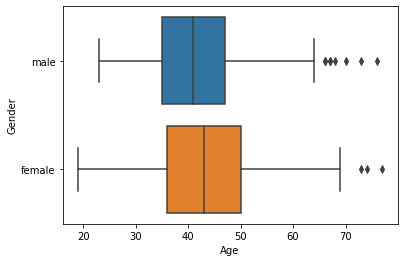

In [200]:
# Your code here

sns.boxplot(x='Age', y='Gender', data=df, orient = 'h');

# Your summary here
# Male authors tend to be younger than female authors.


|Line Number| Code | Explanation|
|---|---|---|
|3.|`sns.boxplot(x='Age', y='Gender', data=df, orient = 'h') `|plots a boxplot divided by `Gender` (y-axis) with `Age` (x-axis) and orients the figure horizontally|


c. The column `'swear'` contains the percentage of swear words in each text. Visualize using a scatter plot whether swearing in literature became more or less common over time (use the `'Publication Year'` column. Summarize the result in one sentence.

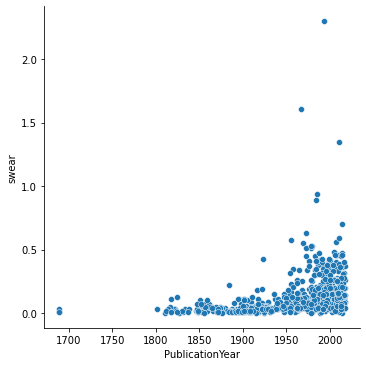

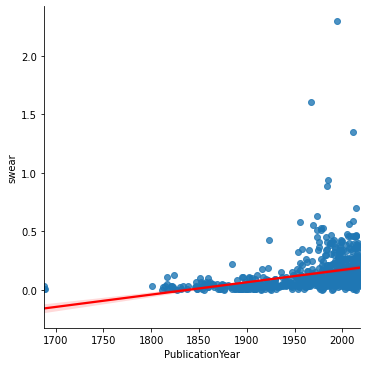

In [211]:
# Your code here
sns.relplot(x = "PublicationYear", y = "swear", data = df);

sns.lmplot(x = "PublicationYear", y = "swear", data = df, line_kws={'color': 'red'});

# Your summary here
# The percentage of swear words has gone up with time i.e. swearing has become more common over time.


|Line Number| Code | Explanation|
|---|---|---|
|3.|`sns.relplot(x = "PublicationYear", y = "swear", data = df);`|Plots a scatter plot of the year of publication (x-axis) against the percentage of swearing in the book (y-axis)|
|4.|`sns.lmplot(x = "PublicationYear", y = "swear", data = df, line_kws={'color': 'red'});`|Plots a linear regression plot (95%CI)|

d. Visualize using a scatter plot whether swearing in literature is more common in younger or older authors (use the `'Age'` column). Summarize the results in one sentence.

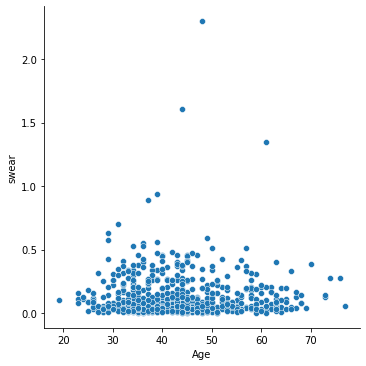

In [205]:
# Your code here

sns.relplot(x='Age', y='swear', data=df);

# Your summary here
# Younger authors do tend to use more swear words than older authors.

|Line Number| Code | Explanation|
|---|---|---|
|3.|`sns.relplot(x='Age', y='swear', data=df);`|Plots a scatter plot of the age of the author (x-axis) against the level of swearing in their books (y-axis)|